In [546]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import boxcox
from scipy.stats import yeojohnson
from scipy.stats import skew
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler

In [547]:
dt_r = pd.read_csv("Received_Payments_Data.csv")
dt_r.head()

,RECEIPT_METHOD,CUSTOMER_NAME,CUSTOMER_NUMBER,RECEIPT_DOC_NO,RECEIPT_DATE,CLASS,CURRENCY_CODE,Local Amount,USD Amount,INVOICE_ALLOCATED,INVOICE_CREATION_DATE,DUE_DATE,PAYMENT_TERM,INVOICE_CLASS,INVOICE_CURRENCY_CODE,INVOICE_TYPE
0,WIRE,C EA Corp,37403,1.421000e+10,20-Apr-21,PMT,USD,370990.92,101018.63040,14200000001,2-Nov-20,30-Dec-20,30 Days from EOM,INV,AED,Non Goods
1,WIRE,RADW Corp,4003,9.921000e+10,31-Jan-21,PMT,SAR,183750.00,48990.21133,99200000043,29-Dec-20,28-Jan-21,30 Days from Inv Date,INV,SAR,Non Goods
2,WIRE,RADW Corp,4003,9.921000e+10,31-Jan-21,PMT,SAR,157500.00,41991.60971,99210000003,30-Jan-21,1-Mar-21,30 Days from Inv Date,INV,SAR,Non Goods
3,WIRE,FARO Corp,1409,9.921000e+10,31-Jan-21,PMT,SAR,157500.00,41991.60971,99200000038,15-Dec-20,14-Jan-21,30 Days from Inv Date,INV,SAR,Non Goods
4,WIRE,RADW Corp,4003,9.921000e+10,31-Jan-21,PMT,SAR,157500.00,41991.60971,99200000039,15-Dec-20,14-Jan-21,30 Days from Inv Date,INV,SAR,Non Goods


In [548]:
dt_r.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93937 entries, 0 to 93936
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   RECEIPT_METHOD         93937 non-null  object 
 1   CUSTOMER_NAME          93937 non-null  object 
 2   CUSTOMER_NUMBER        93937 non-null  int64  
 3   RECEIPT_DOC_NO         93908 non-null  float64
 4   RECEIPT_DATE           93937 non-null  object 
 5   CLASS                  93937 non-null  object 
 6   CURRENCY_CODE          93937 non-null  object 
 7   Local Amount           93937 non-null  float64
 8   USD Amount             93937 non-null  float64
 9   INVOICE_ALLOCATED      93937 non-null  object 
 10  INVOICE_CREATION_DATE  93937 non-null  object 
 11  DUE_DATE               93937 non-null  object 
 12  PAYMENT_TERM           93937 non-null  object 
 13  INVOICE_CLASS          93937 non-null  object 
 14  INVOICE_CURRENCY_CODE  93937 non-null  object 
 15  IN

In [549]:
dt_r.describe()

,CUSTOMER_NUMBER,RECEIPT_DOC_NO,Local Amount,USD Amount
count,93937.000000,9.390800e+04,9.393700e+04,9.393700e+04
mean,12753.874033,1.583908e+11,1.066470e+06,5.312013e+05
std,14274.170829,3.885359e+10,1.546901e+06,9.508693e+05
min,1044.000000,1.421000e+10,0.000000e+00,0.000000e+00
25%,1888.000000,1.470000e+11,8.198039e+04,3.766298e+04
50%,4003.000000,1.510000e+11,4.053438e+05,1.810010e+05
75%,20884.000000,1.690000e+11,1.425606e+06,5.996137e+05
max,52940.000000,2.970000e+11,1.084983e+07,1.084983e+07


In [550]:
dt_r[dt_r['RECEIPT_DOC_NO'].isnull()].head()

,RECEIPT_METHOD,CUSTOMER_NAME,CUSTOMER_NUMBER,RECEIPT_DOC_NO,RECEIPT_DATE,CLASS,CURRENCY_CODE,Local Amount,USD Amount,INVOICE_ALLOCATED,INVOICE_CREATION_DATE,DUE_DATE,PAYMENT_TERM,INVOICE_CLASS,INVOICE_CURRENCY_CODE,INVOICE_TYPE
93908,CHEQUE,SENS Corp,48486,NaN,8-Apr-21,PMT,AED,1443.43,1443.43,2.842E+11,16-Feb-21,30-Mar-21,30 Days from EOM,INV,AED,Goods
93909,WIRE,NAMS Corp,21145,NaN,1-Apr-21,PMT,AED,23574.33,23574.33,2.842E+11,24-Jan-21,24-Mar-21,60 Days from Inv Date,INV,AED,Goods
93910,WIRE,GRAN Corp,21312,NaN,8-Apr-21,PMT,USD,41793.60,41793.60,2.842E+11,22-Dec-20,20-Jan-21,30 Days from Inv Date,INV,USD,Goods
93911,WIRE,GRAN Corp,21312,NaN,8-Apr-21,PMT,USD,41793.60,41793.60,2.842E+11,28-Jan-21,28-Jan-21,Immediate,CM,USD,Goods
93912,WIRE,ANAN Corp,21251,NaN,8-Apr-21,PMT,USD,6398.74,6398.74,2.842E+11,11-Mar-21,10-Apr-21,30 Days from Inv Date,INV,AED,Goods


In [551]:
dt_r.shape

(93937, 16)

In [552]:
dt_r = dt_r.drop_duplicates()
dt_r.shape

(42900, 16)

In [553]:
dt_r['RECEIPT_DATE'] = pd.to_datetime(dt_r.RECEIPT_DATE)
dt_r['INVOICE_CREATION_DATE'] = pd.to_datetime(dt_r['INVOICE_CREATION_DATE'])
dt_r['DUE_DATE'] = pd.to_datetime(dt_r['DUE_DATE'])
dt_r.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42900 entries, 0 to 93931
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   RECEIPT_METHOD         42900 non-null  object        
 1   CUSTOMER_NAME          42900 non-null  object        
 2   CUSTOMER_NUMBER        42900 non-null  int64         
 3   RECEIPT_DOC_NO         42883 non-null  float64       
 4   RECEIPT_DATE           42900 non-null  datetime64[ns]
 5   CLASS                  42900 non-null  object        
 6   CURRENCY_CODE          42900 non-null  object        
 7   Local Amount           42900 non-null  float64       
 8   USD Amount             42900 non-null  float64       
 9   INVOICE_ALLOCATED      42900 non-null  object        
 10  INVOICE_CREATION_DATE  42900 non-null  datetime64[ns]
 11  DUE_DATE               42900 non-null  datetime64[ns]
 12  PAYMENT_TERM           42900 non-null  object        
 13  I

In [554]:
#Due date should be later than invoice creation date. Hence avoiding the otherwise data
dt_r = dt_r[dt_r['DUE_DATE'] >= dt_r['INVOICE_CREATION_DATE']]
dt_r.shape

(39720, 16)

Invoice_class column has 93% of one data which causes data imbalance
Class column has only value so it is not useful. We can drop that column


Drop columns that are not of use for the analysis.
Dropping CLASS, INVOICE_CLASS, RECEIPT_DOC_NO and RECEIPT_METHOD

In [555]:
dt_new = dt_r.drop(['CLASS','INVOICE_CLASS','RECEIPT_DOC_NO','RECEIPT_METHOD'],axis = 1)
dt_new.head()

,CUSTOMER_NAME,CUSTOMER_NUMBER,RECEIPT_DATE,CURRENCY_CODE,Local Amount,USD Amount,INVOICE_ALLOCATED,INVOICE_CREATION_DATE,DUE_DATE,PAYMENT_TERM,INVOICE_CURRENCY_CODE,INVOICE_TYPE
0,C EA Corp,37403,2021-04-20,USD,370990.92,101018.63040,14200000001,2020-11-02,2020-12-30,30 Days from EOM,AED,Non Goods
1,RADW Corp,4003,2021-01-31,SAR,183750.00,48990.21133,99200000043,2020-12-29,2021-01-28,30 Days from Inv Date,SAR,Non Goods
2,RADW Corp,4003,2021-01-31,SAR,157500.00,41991.60971,99210000003,2021-01-30,2021-03-01,30 Days from Inv Date,SAR,Non Goods
3,FARO Corp,1409,2021-01-31,SAR,157500.00,41991.60971,99200000038,2020-12-15,2021-01-14,30 Days from Inv Date,SAR,Non Goods
4,RADW Corp,4003,2021-01-31,SAR,157500.00,41991.60971,99200000039,2020-12-15,2021-01-14,30 Days from Inv Date,SAR,Non Goods


In [556]:
dt_new.isnull().sum()

CUSTOMER_NAME            0
CUSTOMER_NUMBER          0
RECEIPT_DATE             0
CURRENCY_CODE            0
Local Amount             0
USD Amount               0
INVOICE_ALLOCATED        0
INVOICE_CREATION_DATE    0
DUE_DATE                 0
PAYMENT_TERM             0
INVOICE_CURRENCY_CODE    0
INVOICE_TYPE             0
dtype: int64

In [557]:
#Derive Target variable from columns receipt date and due_date. i.e.  Late payment - 1, Not late payment - 0

dt_new['Target'] = dt_new.apply(lambda x:0 if(x.RECEIPT_DATE <= x.DUE_DATE) else 1,axis = 1)
dt_new.head()

,CUSTOMER_NAME,CUSTOMER_NUMBER,RECEIPT_DATE,CURRENCY_CODE,Local Amount,USD Amount,INVOICE_ALLOCATED,INVOICE_CREATION_DATE,DUE_DATE,PAYMENT_TERM,INVOICE_CURRENCY_CODE,INVOICE_TYPE,Target
0,C EA Corp,37403,2021-04-20,USD,370990.92,101018.63040,14200000001,2020-11-02,2020-12-30,30 Days from EOM,AED,Non Goods,1
1,RADW Corp,4003,2021-01-31,SAR,183750.00,48990.21133,99200000043,2020-12-29,2021-01-28,30 Days from Inv Date,SAR,Non Goods,1
2,RADW Corp,4003,2021-01-31,SAR,157500.00,41991.60971,99210000003,2021-01-30,2021-03-01,30 Days from Inv Date,SAR,Non Goods,0
3,FARO Corp,1409,2021-01-31,SAR,157500.00,41991.60971,99200000038,2020-12-15,2021-01-14,30 Days from Inv Date,SAR,Non Goods,1
4,RADW Corp,4003,2021-01-31,SAR,157500.00,41991.60971,99200000039,2020-12-15,2021-01-14,30 Days from Inv Date,SAR,Non Goods,1


In [558]:
#Extract payment time from invoice creation date and due date and drop the payment term column
dt_new['Payment_term'] = (dt_new['DUE_DATE'] - dt_new['INVOICE_CREATION_DATE']).dt.days
dt_new = dt_new.drop('PAYMENT_TERM',axis = 1)
dt_new.head()

,CUSTOMER_NAME,CUSTOMER_NUMBER,RECEIPT_DATE,CURRENCY_CODE,Local Amount,USD Amount,INVOICE_ALLOCATED,INVOICE_CREATION_DATE,DUE_DATE,INVOICE_CURRENCY_CODE,INVOICE_TYPE,Target,Payment_term
0,C EA Corp,37403,2021-04-20,USD,370990.92,101018.63040,14200000001,2020-11-02,2020-12-30,AED,Non Goods,1,58
1,RADW Corp,4003,2021-01-31,SAR,183750.00,48990.21133,99200000043,2020-12-29,2021-01-28,SAR,Non Goods,1,30
2,RADW Corp,4003,2021-01-31,SAR,157500.00,41991.60971,99210000003,2021-01-30,2021-03-01,SAR,Non Goods,0,30
3,FARO Corp,1409,2021-01-31,SAR,157500.00,41991.60971,99200000038,2020-12-15,2021-01-14,SAR,Non Goods,1,30
4,RADW Corp,4003,2021-01-31,SAR,157500.00,41991.60971,99200000039,2020-12-15,2021-01-14,SAR,Non Goods,1,30


In [559]:
dt_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39720 entries, 0 to 93931
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   CUSTOMER_NAME          39720 non-null  object        
 1   CUSTOMER_NUMBER        39720 non-null  int64         
 2   RECEIPT_DATE           39720 non-null  datetime64[ns]
 3   CURRENCY_CODE          39720 non-null  object        
 4   Local Amount           39720 non-null  float64       
 5   USD Amount             39720 non-null  float64       
 6   INVOICE_ALLOCATED      39720 non-null  object        
 7   INVOICE_CREATION_DATE  39720 non-null  datetime64[ns]
 8   DUE_DATE               39720 non-null  datetime64[ns]
 9   INVOICE_CURRENCY_CODE  39720 non-null  object        
 10  INVOICE_TYPE           39720 non-null  object        
 11  Target                 39720 non-null  int64         
 12  Payment_term           39720 non-null  int64         
dtypes

In [560]:
#To check imbalance of data
data_nlatepaid = dt_new[dt_new["Target"]==0]
data_latepaid = dt_new[dt_new["Target"]==1]
print(dt_new[dt_new["Target"]==0].shape[0]/dt_new.shape[0])
print(dt_new[dt_new["Target"]==1].shape[0]/dt_new.shape[0])

0.38147029204431016
0.6185297079556898


In [263]:
#Auto EDA
import sweetviz as sv
sweet_report = sv.analyze(dt_new)
sweet_report.show_html('sweet_report.html')


Report sweet_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## Data Visualisation

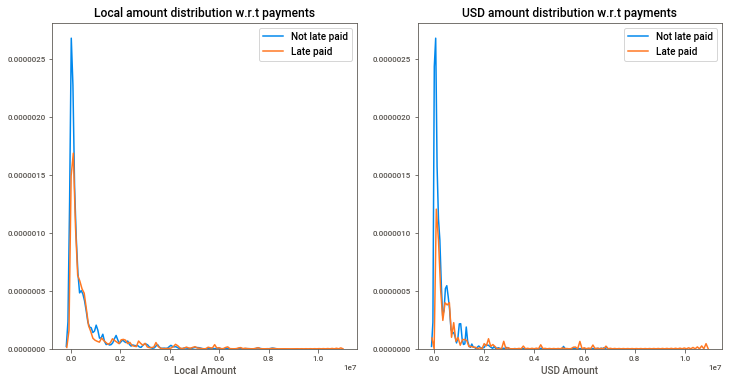

In [561]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

ax1 = sns.distplot(data_nlatepaid['Local Amount'], label = "Not late paid", hist = False, ax = ax[0])
ax1 = sns.distplot(data_latepaid['Local Amount'], label = "Late paid", hist = False, ax = ax[0])
ax1.set_xlabel('Local Amount')
ax1.set_title('Local amount distribution w.r.t payments')

ax2 = sns.distplot(data_nlatepaid['USD Amount'], label = "Not late paid", hist = False, ax = ax[1])
ax2 = sns.distplot(data_latepaid['USD Amount'], label = "Late paid", hist = False, ax = ax[1])
ax2.set_xlabel('USD Amount')
ax2.set_title('USD amount distribution w.r.t payments')
plt.show()

Local Amount and USD amount have the same kind of distribution and data and they might be very much correlated with each other. So we can drop Local amount
Also we can observe that most of the higher value transactions are not being paid late

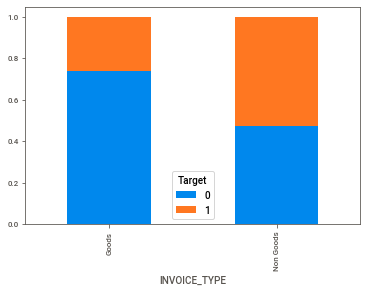

In [375]:
pd.crosstab(dt_new['INVOICE_TYPE'], dt_new['Target'],normalize = 'index').plot(kind='bar', stacked=True)
plt.show()

We can observe that the % of Non Goods invoice type being paid are more compared to Goods

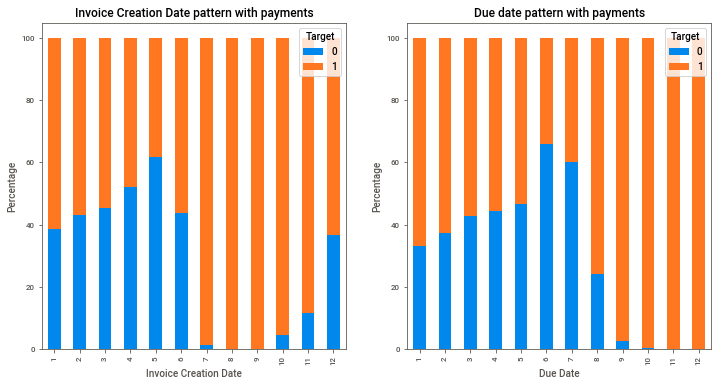

In [562]:
cross = pd.crosstab(dt_new['INVOICE_CREATION_DATE'].dt.month, dt_new['Target'],normalize='index')*100
cross1 = pd.crosstab(dt_new['DUE_DATE'].dt.month, dt_new['Target'],normalize='index')*100

# Plot the data for the Invoice creation date
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
ax1 = cross.plot(kind='bar', stacked=True, ax=axes[0])
ax1.set_ylabel('Percentage')
ax1.set_xlabel('Invoice Creation Date')
ax1.set_title('Invoice Creation Date pattern with payments')

# Plot the data for the second subplot
ax2 = cross1.plot(kind='bar', stacked=True, ax=axes[1])
ax2.set_ylabel('Percentage')
ax2.set_xlabel('Due Date')
ax2.set_title('Due date pattern with payments')
plt.show()

- We can observe that the invoices created in the months of July, Aug, Sept, Oct have high chances of not paying within the due date.
- Also when the due dates line in the months of Sept, Oct, Nov and Dec are mostly not getting paid

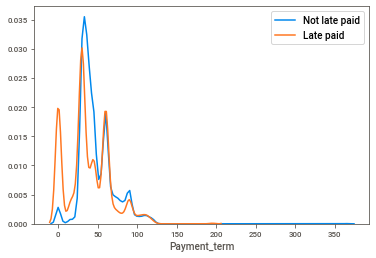

<Figure size 2880x720 with 0 Axes>

In [563]:
# Lets look at the Payment term data as well 

sns.distplot(data_nlatepaid['Payment_term'], label = "Not late paid", hist = False)
sns.distplot(data_latepaid['Payment_term'], label = "Late paid", hist = False)
plt.figure(figsize = (40,10))
plt.show()


The invoices with payment term more than 200 days are being paid within due date

## RFM

Lets derive Recency, Frequency and Monetary values which will help in clustering the customers.


In [564]:
#Recency
dt_r.groupby(['CUSTOMER_NAME','CUSTOMER_NUMBER'])['CUSTOMER_NUMBER'].count()
#dt_r[dt_r['CUSTOMER_NAME']=='3D D Corp'].shape
RFM_df = dt_r.groupby('CUSTOMER_NUMBER').apply(lambda group: pd.Series({
    'Recency': (pd.to_datetime('today') - group['INVOICE_CREATION_DATE'].max()).days,
    'Frequency': group.shape[0],
    'Monetary': group['USD Amount'].sum()
})).reset_index()


dt_RFM = pd.merge(dt_r, RFM_df, on='CUSTOMER_NUMBER', how='left')

dt_RFM.head()


,RECEIPT_METHOD,CUSTOMER_NAME,CUSTOMER_NUMBER,RECEIPT_DOC_NO,RECEIPT_DATE,CLASS,CURRENCY_CODE,Local Amount,USD Amount,INVOICE_ALLOCATED,INVOICE_CREATION_DATE,DUE_DATE,PAYMENT_TERM,INVOICE_CLASS,INVOICE_CURRENCY_CODE,INVOICE_TYPE,Recency,Frequency,Monetary
0,WIRE,C EA Corp,37403,1.421000e+10,2021-04-20,PMT,USD,370990.92,101018.63040,14200000001,2020-11-02,2020-12-30,30 Days from EOM,INV,AED,Non Goods,1035.0,3.0,1.038883e+05
1,WIRE,RADW Corp,4003,9.921000e+10,2021-01-31,PMT,SAR,183750.00,48990.21133,99200000043,2020-12-29,2021-01-28,30 Days from Inv Date,INV,SAR,Non Goods,957.0,476.0,1.435137e+08
2,WIRE,RADW Corp,4003,9.921000e+10,2021-01-31,PMT,SAR,157500.00,41991.60971,99210000003,2021-01-30,2021-03-01,30 Days from Inv Date,INV,SAR,Non Goods,957.0,476.0,1.435137e+08
3,WIRE,FARO Corp,1409,9.921000e+10,2021-01-31,PMT,SAR,157500.00,41991.60971,99200000038,2020-12-15,2021-01-14,30 Days from Inv Date,INV,SAR,Non Goods,965.0,3888.0,1.439882e+09
4,WIRE,RADW Corp,4003,9.921000e+10,2021-01-31,PMT,SAR,157500.00,41991.60971,99200000039,2020-12-15,2021-01-14,30 Days from Inv Date,INV,SAR,Non Goods,957.0,476.0,1.435137e+08


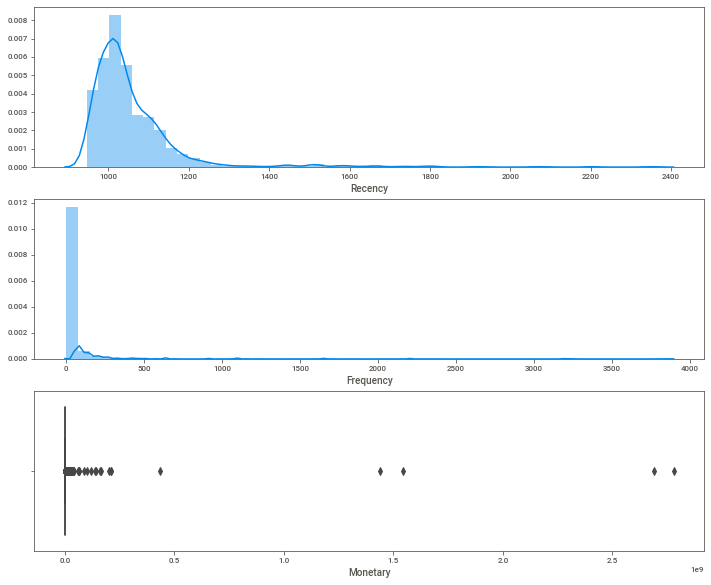

In [565]:
# Checking the distribution of Recency, Frequency and MonetaryValue variables.
plt.figure(figsize=(12,10))
# Plot distribution of Recency
plt.subplot(3, 1, 1); sns.distplot(RFM_df['Recency'])
# Plot distribution of Frequency
plt.subplot(3, 1, 2); sns.distplot(RFM_df['Frequency'])
# Plot distribution of Monetary
plt.subplot(3, 1, 3); sns.boxplot(x='Monetary', data=RFM_df, palette='magma')

The RFM values look rather very much skewed towards the right. Hence we need to apply boxcox transformation, use standard scaler and look at the data again

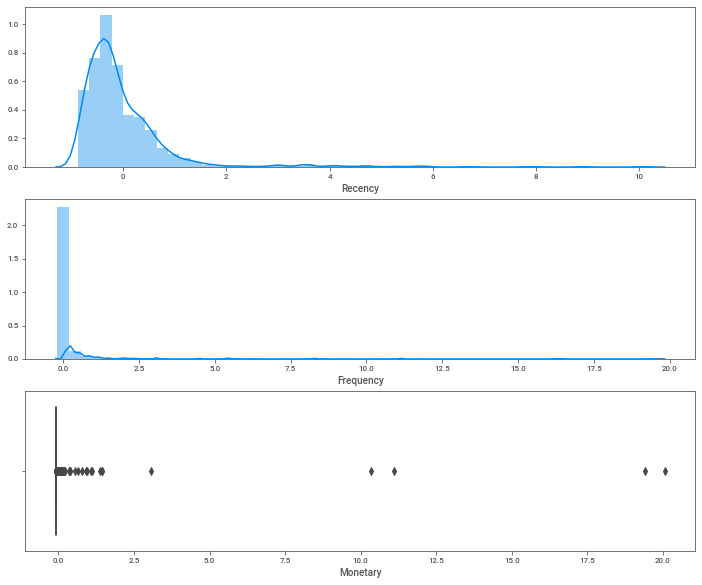

In [566]:
from scipy.stats import boxcox
#Applying log transformation on RFM values
RFM_df_scaled = RFM_df.drop(['CUSTOMER_NUMBER'],axis=1)
RFM_df_scaled['Recency'],_ = boxcox(RFM_df['Recency']+1)
RFM_df_scaled['Frequency'],_ = boxcox(RFM_df['Frequency']+1)
RFM_df_scaled['Monetary'],_ = boxcox(RFM_df['Monetary']+1)

scaler = StandardScaler()
RFM_df_scaled[['Recency','Frequency','Monetary']] = scaler.fit_transform(RFM_df[['Recency','Frequency','Monetary']])

# Checking the distribution of Recency, Frequency and MonetaryValue variables again
plt.figure(figsize=(12,10))
# Plot distribution of Recency
plt.subplot(3, 1, 1); sns.distplot(RFM_df_scaled['Recency'])
# Plot distribution of Frequency
plt.subplot(3, 1, 2); sns.distplot(RFM_df_scaled['Frequency'])
# Plot distribution of Monetary
plt.subplot(3, 1, 3); sns.boxplot(x='Monetary', data=RFM_df_scaled, palette='magma')

## K Means Clustering

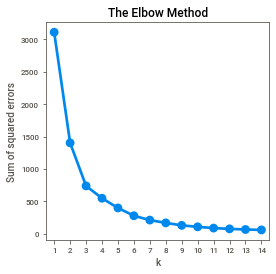

In [567]:
from sklearn.cluster import KMeans
sse = {}
# Fit KMeans and calculate SSE for each k
for k in range(1, 15):
  
    # Initialize KMeans with k clusters
    kmeans = KMeans(n_clusters=k, random_state=1)
    
    # Fit KMeans on the normalized dataset
    kmeans.fit(RFM_df_scaled)
    
    # Assign sum of squared distances to k element of dictionary
    sse[k] = kmeans.inertia_
# Plotting the elbow plot
plt.figure(figsize=(4,4))
plt.title('The Elbow Method')
plt.xlabel('k'); 
plt.ylabel('Sum of squared errors')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

In [568]:
from sklearn.metrics import silhouette_score 
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(RFM_df_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(RFM_df_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.9547268621690279
For n_clusters=3, the silhouette score is 0.8312341748800386
For n_clusters=4, the silhouette score is 0.52416242124434
For n_clusters=5, the silhouette score is 0.5245694868407871
For n_clusters=6, the silhouette score is 0.5594885008309209
For n_clusters=7, the silhouette score is 0.5606671627393505
For n_clusters=8, the silhouette score is 0.5688128808597934


### Lets select 3 clusters as an optimal value

In [569]:
# final model with k=3
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(RFM_df_scaled)

KMeans(max_iter=50, n_clusters=3)

In [570]:
RFM_df['ClusterId'] = kmeans.labels_
RFM_df.head()

,CUSTOMER_NUMBER,Recency,Frequency,Monetary,ClusterId
0,1044,978.0,646.0,2.089238e+08,1
1,1076,985.0,48.0,1.366327e+06,1
2,1146,1051.0,37.0,6.213654e+05,1
3,1154,954.0,81.0,1.839395e+07,1
4,1192,1057.0,13.0,3.884282e+04,1


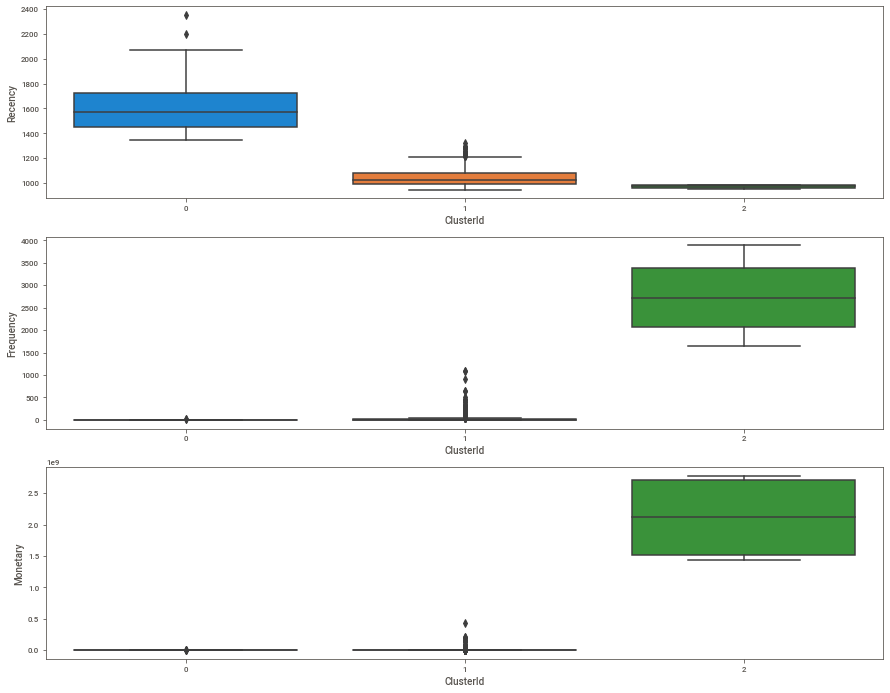

In [571]:
#Lets Analyse the different clusters nature

# Plot distribution of Recency
plt.figure(figsize = (15,12))
plt.subplot(3, 1, 1); sns.boxplot(x='ClusterId', y='Recency', data=RFM_df)
# Plot distribution of Frequency
plt.subplot(3, 1, 2); sns.boxplot(x='ClusterId', y='Frequency', data=RFM_df)
# Plot distribution of Monetary
plt.subplot(3, 1, 3); sns.boxplot(x='ClusterId', y='Monetary', data=RFM_df)

plt.show()

We can divide the existing customers into 3 clusters
- The first cluster being high recency, low activity and low purchase values customers.They can be labelled as Occasional Engagers
- The second cluster being medium recency, medium activity and medium/low purchase valued customers. They can be labelled as Regular Customers
- The third cluster being low recency, high frequency and high monetary valued customers. They can be labelled as High-Value, High-Frequency Customers

For the current problem statement we can concentrate more on  high value customers payment as they bring more business and the loss if they dont pay their bills on time is huge.

In [572]:
#Merge the RFM DF to the existing DF and get final DF to work on 
dt_final = pd.merge(dt_new, RFM_df, on ='CUSTOMER_NUMBER', how = 'left')
print(dt_final.shape)
#Removing the outliers which we cleared earlier
dt_final = dt_final[~(dt_final['Recency'].isna())]
dt_final.isna().sum()
print(dt_final.shape)

(39720, 17)
(39720, 17)


In [573]:
#Drop INVOICE_TYPE as this is not there in the test data
dt_final.drop(['INVOICE_TYPE'],axis = 1, inplace = True)
dt_final.head()

,CUSTOMER_NAME,CUSTOMER_NUMBER,RECEIPT_DATE,CURRENCY_CODE,Local Amount,USD Amount,INVOICE_ALLOCATED,INVOICE_CREATION_DATE,DUE_DATE,INVOICE_CURRENCY_CODE,Target,Payment_term,Recency,Frequency,Monetary,ClusterId
0,C EA Corp,37403,2021-04-20,USD,370990.92,101018.63040,14200000001,2020-11-02,2020-12-30,AED,1,58,1035.0,3.0,1.038883e+05,1
1,RADW Corp,4003,2021-01-31,SAR,183750.00,48990.21133,99200000043,2020-12-29,2021-01-28,SAR,1,30,957.0,476.0,1.435137e+08,1
2,RADW Corp,4003,2021-01-31,SAR,157500.00,41991.60971,99210000003,2021-01-30,2021-03-01,SAR,0,30,957.0,476.0,1.435137e+08,1
3,FARO Corp,1409,2021-01-31,SAR,157500.00,41991.60971,99200000038,2020-12-15,2021-01-14,SAR,1,30,965.0,3888.0,1.439882e+09,2
4,RADW Corp,4003,2021-01-31,SAR,157500.00,41991.60971,99200000039,2020-12-15,2021-01-14,SAR,1,30,957.0,476.0,1.435137e+08,1


## Data Modelling

In [574]:
# Days-of-pay have some zerop values
#dt_final = dt_final[~(dt_final['Days-to-pay']==0)]
X = dt_final.drop(['Target'],axis =1)
#Drop unique IDs
X.drop(['CUSTOMER_NAME','INVOICE_ALLOCATED','CUSTOMER_NUMBER'],axis = 1, inplace=True)
#Dropping Date columns
X.drop(['RECEIPT_DATE','INVOICE_CREATION_DATE','DUE_DATE'], axis = 1, inplace = True)
#Dropping Currency Code column as this is not there in the open invoice data
X.drop(['CURRENCY_CODE'],axis = 1, inplace = True)
#Drop Local Amount variable as it will be correlated with USD amount
X.drop(['Local Amount'],axis = 1, inplace = True)
#Separating the target variable
y = dt_final['Target']

In [575]:
#Split the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [576]:
#Lets create dummy varibles for the categorical columns
dummy = pd.get_dummies(X_train[['INVOICE_CURRENCY_CODE']],drop_first = True)
X_train_f = pd.concat([X_train,dummy],axis = 1)
X_train_f.drop(['INVOICE_CURRENCY_CODE'],axis = 1, inplace = True)
X_train_f.head()

,USD Amount,Payment_term,Recency,Frequency,Monetary,ClusterId,INVOICE_CURRENCY_CODE_BHD,INVOICE_CURRENCY_CODE_EUR,INVOICE_CURRENCY_CODE_GBP,INVOICE_CURRENCY_CODE_JOD,INVOICE_CURRENCY_CODE_KWD,INVOICE_CURRENCY_CODE_QAR,INVOICE_CURRENCY_CODE_SAR,INVOICE_CURRENCY_CODE_USD,INVOICE_CURRENCY_CODE_ZAR
32969,3.076475e+05,35,950.0,3203.0,1.541415e+09,2,0,0,0,0,0,0,0,0,0
28480,1.007394e+06,33,950.0,3203.0,1.541415e+09,2,0,0,0,0,0,0,0,0,0
19533,3.060490e+03,32,982.0,148.0,3.946346e+06,1,0,0,0,0,0,0,0,0,0
21429,5.005724e+03,34,981.0,243.0,1.274394e+07,1,0,0,0,0,0,0,0,0,0
24923,3.231435e+05,60,995.0,444.0,2.001628e+08,1,0,0,0,0,0,0,0,0,0


In [577]:
# The columns Recency, Frequency, monetary, local amount and USD amount are all skewed values. Hence using log transformation on it to reduce skewness.

cols = ['USD Amount','Payment_term','Recency','Frequency','Monetary']

for col in cols:
    X_train_f[col],_ = boxcox(X_train_f[col]+1)

X_train_f.head()

,USD Amount,Payment_term,Recency,Frequency,Monetary,ClusterId,INVOICE_CURRENCY_CODE_BHD,INVOICE_CURRENCY_CODE_EUR,INVOICE_CURRENCY_CODE_GBP,INVOICE_CURRENCY_CODE_JOD,INVOICE_CURRENCY_CODE_KWD,INVOICE_CURRENCY_CODE_QAR,INVOICE_CURRENCY_CODE_SAR,INVOICE_CURRENCY_CODE_USD,INVOICE_CURRENCY_CODE_ZAR
32969,31.738199,15.262941,0.060252,12.103138,60.293869,2,0,0,0,0,0,0,0,0,0
28480,38.253465,14.626910,0.060252,12.103138,60.293869,2,0,0,0,0,0,0,0,0,0
19533,14.059247,14.304386,0.060252,6.395980,31.373087,1,0,0,0,0,0,0,0,0,0
21429,15.485699,14.946390,0.060252,7.205674,35.944285,1,0,0,0,0,0,0,0,0,0
24923,31.988836,22.454241,0.060252,8.244470,48.689410,1,0,0,0,0,0,0,0,0,0


In [578]:
## Lets scale the integer columns 
from sklearn.preprocessing import MinMaxScaler
mscaler = MinMaxScaler()
X_train_f[cols] = mscaler.fit_transform(X_train_f[cols])
X_train_f.head()

,USD Amount,Payment_term,Recency,Frequency,Monetary,ClusterId,INVOICE_CURRENCY_CODE_BHD,INVOICE_CURRENCY_CODE_EUR,INVOICE_CURRENCY_CODE_GBP,INVOICE_CURRENCY_CODE_JOD,INVOICE_CURRENCY_CODE_KWD,INVOICE_CURRENCY_CODE_QAR,INVOICE_CURRENCY_CODE_SAR,INVOICE_CURRENCY_CODE_USD,INVOICE_CURRENCY_CODE_ZAR
32969,0.580009,0.192900,0.0,0.964516,0.941464,2,0,0,0,0,0,0,0,0,0
28480,0.699075,0.184862,0.0,0.964516,0.941464,2,0,0,0,0,0,0,0,0,0
19533,0.256930,0.180786,0.0,0.481093,0.489878,1,0,0,0,0,0,0,0,0,0
21429,0.282998,0.188900,0.0,0.549678,0.561255,1,0,0,0,0,0,0,0,0,0
24923,0.584590,0.283787,0.0,0.637669,0.760265,1,0,0,0,0,0,0,0,0,0


# Logistic regression

In [579]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn import model_selection, tree, ensemble, metrics
lr = LogisticRegression()
lr.fit(X_train_f,y_train)
print("Train score :")
print(lr.score(X_train_f,y_train))
col = X_train_f.columns

Train score :
0.6504819450438786


In [580]:
dummy_test = pd.get_dummies(X_test[['INVOICE_CURRENCY_CODE']],drop_first = True)
X_test = pd.concat([X_test,dummy_test],axis = 1)
X_test.drop(['INVOICE_CURRENCY_CODE'],axis = 1, inplace = True)

#Log transformation for skewed variables
cols = ['USD Amount','Payment_term','Recency','Frequency','Monetary']
for col in cols:
    X_test[col],_ = boxcox(X_test[col]+1)
#MinMax scalar transformation on numerical columns
X_test[cols] = mscaler.transform(X_test[cols])

print("Test score :")
cols = X_train_f.columns
print(lr.score(X_test[cols],y_test))
pred = lr.predict(X_test[cols])

print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Test score :
0.6470292044310171
[[1569 2974]
 [1232 6141]]
              precision    recall  f1-score   support

           0       0.56      0.35      0.43      4543
           1       0.67      0.83      0.74      7373

    accuracy                           0.65     11916
   macro avg       0.62      0.59      0.59     11916
weighted avg       0.63      0.65      0.62     11916



In [581]:
import statsmodels.api as sm

# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train_f)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 Target   No. Observations:                27804
Model:                            GLM   Df Residuals:                    27789
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -17157.
Date:                Tue, 06 Feb 2024   Deviance:                       34314.
Time:                        21:53:25   Pearson chi2:                 2.76e+04
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         1.4263      0.054     26.323      0.000       1.320       1.532
USD Amount                   -0.2101      0.123     -1.714      0.086      -0.450       0.030
Payment_term                 -4.8966      0.134    -36.638      0.000      -5.159      -4.635
Recency                   -8.277e-11   7.94e-08     -0.001      0.999   -1.56e-07    1.56e-07
Frequency                    -0.7100      0.136     -5.224      0.000      -0.976      -0.444
Monetary                      0.4266      0.187      2.287      0.022       0.061       0.792
ClusterId                    -0.0967      0.051     -1.879      0.060      -0.197       0.004
INVOICE_CURRENCY_CODE_BHD     0.0749      0.174      0.431      0.666      -0.265       0.415
INVOICE_CURRENCY_CODE_EUR     0.1158      0.120      0.968      0.333      -0.119       0.350
INVOICE_CURRENCY_CODE_GBP     1.5615      0.491      3.179      0.001       0.599       2.524
INVOICE_CURRENCY_CODE_JOD    23.2559   2.23e+04      0.001      0.999   -4.37e+04    4.37e+04
INVOICE_CURRENCY_CODE_KWD     1.4294      0.146      9.809      0.000       1.144       1.715
INVOICE_CURRENCY_CODE_QAR     2.0203      0.300      6.739      0.000       1.433       2.608
INVOICE_CURRENCY_CODE_SAR     0.8985      0.030     29.940      0.000       0.840       0.957
INVOICE_CURRENCY_CODE_USD     0.6733      0.038     17.867      0.000       0.599       0.747
INVOICE_CURRENCY_CODE_ZAR    25.5126   1.87e+04      0.001      0.999   -3.67e+04    3.67e+04
=============================================================================================
"""

Many variable have high p values. Lets also look at VIF values and decide on removing the variables

In [582]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
col = list(X_train_f.columns)
zero_var_cols = X_train_f[cols].columns[X_train_f[cols].var() == 0]
col.remove(zero_var_cols)
vif['Features'] = X_train_f[col].columns
vif['VIF'] = [variance_inflation_factor(X_train_f[col].values, i) for i in range(X_train_f[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Monetary,96.83
2,Frequency,45.71
4,ClusterId,26.39
0,USD Amount,20.23
1,Payment_term,3.68
11,INVOICE_CURRENCY_CODE_SAR,1.94
12,INVOICE_CURRENCY_CODE_USD,1.48
9,INVOICE_CURRENCY_CODE_KWD,1.06
6,INVOICE_CURRENCY_CODE_EUR,1.05
5,INVOICE_CURRENCY_CODE_BHD,1.01


In [583]:
X_train_f.drop(['INVOICE_CURRENCY_CODE_ZAR','INVOICE_CURRENCY_CODE_JOD','Recency'],axis = 1, inplace = True)

logm2 = sm.GLM(y_train,(sm.add_constant(X_train_f)), family = sm.families.Binomial())
logm2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 Target   No. Observations:                27804
Model:                            GLM   Df Residuals:                    27791
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -17200.
Date:                Tue, 06 Feb 2024   Deviance:                       34401.
Time:                        21:53:27   Pearson chi2:                 2.77e+04
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         1.4093      0.054     26.082      0.000       1.303       1.515
USD Amount                   -0.1823      0.122     -1.490      0.136      -0.422       0.057
Payment_term                 -4.7803      0.133    -36.031      0.000      -5.040      -4.520
Frequency                    -0.7376      0.136     -5.437      0.000      -1.003      -0.472
Monetary                      0.4211      0.186      2.262      0.024       0.056       0.786
ClusterId                    -0.0900      0.051     -1.751      0.080      -0.191       0.011
INVOICE_CURRENCY_CODE_BHD     0.0631      0.173      0.364      0.716      -0.277       0.403
INVOICE_CURRENCY_CODE_EUR     0.0998      0.119      0.836      0.403      -0.134       0.334
INVOICE_CURRENCY_CODE_GBP     1.5463      0.491      3.151      0.002       0.584       2.508
INVOICE_CURRENCY_CODE_KWD     1.4159      0.146      9.725      0.000       1.131       1.701
INVOICE_CURRENCY_CODE_QAR     2.0049      0.300      6.689      0.000       1.417       2.592
INVOICE_CURRENCY_CODE_SAR     0.8878      0.030     29.639      0.000       0.829       0.947
INVOICE_CURRENCY_CODE_USD     0.6619      0.038     17.593      0.000       0.588       0.736
=============================================================================================
"""

In [584]:
X_train_f.drop(['INVOICE_CURRENCY_CODE_BHD','INVOICE_CURRENCY_CODE_EUR'],axis = 1, inplace = True)
logm3 = sm.GLM(y_train,(sm.add_constant(X_train_f)), family = sm.families.Binomial())
logm3.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 Target   No. Observations:                27804
Model:                            GLM   Df Residuals:                    27793
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -17201.
Date:                Tue, 06 Feb 2024   Deviance:                       34402.
Time:                        21:53:27   Pearson chi2:                 2.77e+04
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         1.4149      0.054     26.364      0.000       1.310       1.520
USD Amount                   -0.1789      0.122     -1.463      0.143      -0.419       0.061
Payment_term                 -4.7813      0.133    -36.055      0.000      -5.041      -4.521
Frequency                    -0.7502      0.135     -5.569      0.000      -1.014      -0.486
Monetary                      0.4216      0.186      2.266      0.023       0.057       0.786
ClusterId                    -0.0868      0.051     -1.694      0.090      -0.187       0.014
INVOICE_CURRENCY_CODE_GBP     1.5395      0.491      3.137      0.002       0.578       2.501
INVOICE_CURRENCY_CODE_KWD     1.4135      0.146      9.710      0.000       1.128       1.699
INVOICE_CURRENCY_CODE_QAR     2.0011      0.300      6.677      0.000       1.414       2.589
INVOICE_CURRENCY_CODE_SAR     0.8843      0.030     29.783      0.000       0.826       0.943
INVOICE_CURRENCY_CODE_USD     0.6577      0.037     17.614      0.000       0.585       0.731
=============================================================================================
"""

In [585]:
vif = pd.DataFrame()
col = X_train_f.columns
vif['Features'] = X_train_f[col].columns
vif['VIF'] = [variance_inflation_factor(X_train_f[col].values, i) for i in range(X_train_f[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Monetary,96.75
2,Frequency,45.00
4,ClusterId,26.08
0,USD Amount,20.14
1,Payment_term,3.63
8,INVOICE_CURRENCY_CODE_SAR,1.91
9,INVOICE_CURRENCY_CODE_USD,1.46
6,INVOICE_CURRENCY_CODE_KWD,1.05
5,INVOICE_CURRENCY_CODE_GBP,1.01
7,INVOICE_CURRENCY_CODE_QAR,1.01


In [586]:
X_train_f.drop(['Monetary'],axis = 1, inplace = True)
logm3 = sm.GLM(y_train,(sm.add_constant(X_train_f)), family = sm.families.Binomial())
logm3.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 Target   No. Observations:                27804
Model:                            GLM   Df Residuals:                    27794
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -17203.
Date:                Tue, 06 Feb 2024   Deviance:                       34407.
Time:                        21:53:28   Pearson chi2:                 2.77e+04
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         1.4241      0.054     26.588      0.000       1.319       1.529
USD Amount                   -0.0151      0.098     -0.153      0.878      -0.208       0.177
Payment_term                 -4.7696      0.132    -36.014      0.000      -5.029      -4.510
Frequency                    -0.5101      0.084     -6.106      0.000      -0.674      -0.346
ClusterId                    -0.0509      0.049     -1.046      0.296      -0.146       0.045
INVOICE_CURRENCY_CODE_GBP     1.5417      0.491      3.141      0.002       0.580       2.504
INVOICE_CURRENCY_CODE_KWD     1.4289      0.145      9.827      0.000       1.144       1.714
INVOICE_CURRENCY_CODE_QAR     2.0253      0.300      6.761      0.000       1.438       2.612
INVOICE_CURRENCY_CODE_SAR     0.8731      0.029     29.842      0.000       0.816       0.930
INVOICE_CURRENCY_CODE_USD     0.6612      0.037     17.728      0.000       0.588       0.734
=============================================================================================
"""

In [587]:
X_train_f.drop(['USD Amount'],axis = 1, inplace = True)
logm3 = sm.GLM(y_train,(sm.add_constant(X_train_f)), family = sm.families.Binomial())
logm3.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 Target   No. Observations:                27804
Model:                            GLM   Df Residuals:                    27795
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -17203.
Date:                Tue, 06 Feb 2024   Deviance:                       34407.
Time:                        21:53:28   Pearson chi2:                 2.77e+04
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         1.4213      0.050     28.260      0.000       1.323       1.520
Payment_term                 -4.7699      0.132    -36.022      0.000      -5.029      -4.510
Frequency                    -0.5135      0.080     -6.387      0.000      -0.671      -0.356
ClusterId                    -0.0523      0.048     -1.091      0.275      -0.146       0.042
INVOICE_CURRENCY_CODE_GBP     1.5403      0.491      3.138      0.002       0.578       2.502
INVOICE_CURRENCY_CODE_KWD     1.4268      0.145      9.856      0.000       1.143       1.711
INVOICE_CURRENCY_CODE_QAR     2.0237      0.299      6.760      0.000       1.437       2.611
INVOICE_CURRENCY_CODE_SAR     0.8731      0.029     29.853      0.000       0.816       0.930
INVOICE_CURRENCY_CODE_USD     0.6602      0.037     17.997      0.000       0.588       0.732
=============================================================================================
"""

In [588]:
vif = pd.DataFrame()
col = X_train_f.columns
vif['Features'] = X_train_f[col].columns
vif['VIF'] = [variance_inflation_factor(X_train_f[col].values, i) for i in range(X_train_f[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,ClusterId,20.16
1,Frequency,16.32
0,Payment_term,3.41
6,INVOICE_CURRENCY_CODE_SAR,1.86
7,INVOICE_CURRENCY_CODE_USD,1.35
4,INVOICE_CURRENCY_CODE_KWD,1.03
5,INVOICE_CURRENCY_CODE_QAR,1.01
3,INVOICE_CURRENCY_CODE_GBP,1.00


In [589]:
X_train_f.drop(['ClusterId'],axis = 1, inplace = True)
logm3 = sm.GLM(y_train,(sm.add_constant(X_train_f)), family = sm.families.Binomial())
logm3.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 Target   No. Observations:                27804
Model:                            GLM   Df Residuals:                    27796
Model Family:                Binomial   Df Model:                            7
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -17204.
Date:                Tue, 06 Feb 2024   Deviance:                       34408.
Time:                        21:53:33   Pearson chi2:                 2.77e+04
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         1.3989      0.046     30.451      0.000       1.309       1.489
Payment_term                 -4.7717      0.132    -36.018      0.000      -5.031      -4.512
Frequency                    -0.5838      0.048    -12.081      0.000      -0.678      -0.489
INVOICE_CURRENCY_CODE_GBP     1.5286      0.491      3.115      0.002       0.567       2.490
INVOICE_CURRENCY_CODE_KWD     1.4437      0.144     10.028      0.000       1.162       1.726
INVOICE_CURRENCY_CODE_QAR     2.0318      0.299      6.788      0.000       1.445       2.618
INVOICE_CURRENCY_CODE_SAR     0.8690      0.029     29.975      0.000       0.812       0.926
INVOICE_CURRENCY_CODE_USD     0.6582      0.037     17.961      0.000       0.586       0.730
=============================================================================================
"""

In [590]:
vif = pd.DataFrame()
col = X_train_f.columns
vif['Features'] = X_train_f[col].columns
vif['VIF'] = [variance_inflation_factor(X_train_f[col].values, i) for i in range(X_train_f[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Frequency,3.21
0,Payment_term,3.07
5,INVOICE_CURRENCY_CODE_SAR,1.77
6,INVOICE_CURRENCY_CODE_USD,1.29
3,INVOICE_CURRENCY_CODE_KWD,1.02
4,INVOICE_CURRENCY_CODE_QAR,1.01
2,INVOICE_CURRENCY_CODE_GBP,1.00


Now the p value and the VIF values are below the allowed range. Hence we can go ahead with this variables

# Decision Tree Classifier

In [591]:
from sklearn.tree import DecisionTreeClassifier
dt_base = DecisionTreeClassifier(random_state=42, max_depth=4)
dt_base.fit(X_train_f, y_train)
y_train_pred = dt_base.predict(X_train_f)
col = X_train_f.columns
y_test_pred = dt_base.predict(X_test[col])
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.57      0.48      0.52      4543
           1       0.71      0.78      0.74      7373

    accuracy                           0.66     11916
   macro avg       0.64      0.63      0.63     11916
weighted avg       0.65      0.66      0.66     11916



# Plot ROC Curve

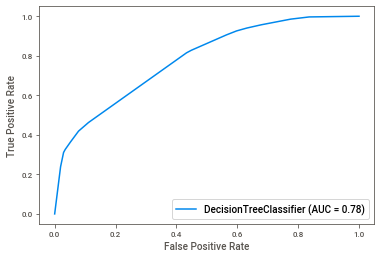

In [419]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(dt_base, X_train_f, y_train, drop_intermediate=False)
plt.show()

# Hyperparameter tuning using GRIDSEARCH

In [420]:
from sklearn.model_selection import GridSearchCV
dt = DecisionTreeClassifier(random_state=42)
params = {
    "max_depth": [2,3,5,10,20],
    "min_samples_leaf": [5,10,20,50,100,500]
}
grid_search = GridSearchCV(estimator=dt,
                           param_grid=params,
                           cv=4,
                           n_jobs=-1, verbose=1, scoring="accuracy")
grid_search.fit(X_train_f, y_train)


Fitting 4 folds for each of 30 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    8.1s finished


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 500]},
             scoring='accuracy', verbose=1)

In [421]:
grid_search.best_score_

0.8023665659617322

In [422]:
dt_best = grid_search.best_estimator_
dt_best

DecisionTreeClassifier(max_depth=20, min_samples_leaf=5, random_state=42)

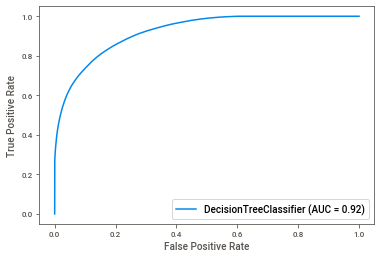

In [423]:
plot_roc_curve(dt_best, X_train_f, y_train)
plt.show()

DecisionTreeClassifier(max_depth=20, min_samples_leaf=5, random_state=42)

In [437]:
X_train_f.head()

,Payment_term,Frequency,INVOICE_CURRENCY_CODE_GBP,INVOICE_CURRENCY_CODE_KWD,INVOICE_CURRENCY_CODE_QAR,INVOICE_CURRENCY_CODE_SAR,INVOICE_CURRENCY_CODE_USD
32969,0.192900,0.964516,0,0,0,0,0
28480,0.184862,0.964516,0,0,0,0,0
19533,0.180786,0.481093,0,0,0,0,0
21429,0.188900,0.549678,0,0,0,0,0
24923,0.283787,0.637669,0,0,0,0,0


# Random Forest

In [506]:
rf = RandomForestClassifier(max_depth=4,max_features=5,random_state=42,oob_score=True)
rf.fit(X_train_f,y_train)

RandomForestClassifier(max_depth=4, max_features=5, oob_score=True,
                       random_state=42)

In [507]:
rf.oob_score_

0.7336354481369587

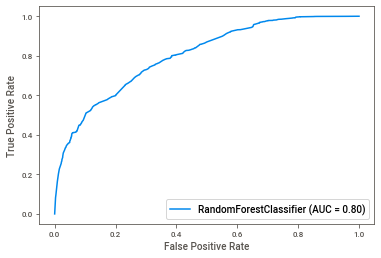

In [508]:
plot_roc_curve(rf, X_train_f, y_train)
plt.show()

# HyperParameter tuning using Random Forest

In [509]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [510]:
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10, 25, 50, 100]
}

In [511]:
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [512]:
grid_search.fit(X_train_f, y_train)

Fitting 4 folds for each of 120 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   13.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   31.3s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:  1.5min finished


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 50, 100]},
             scoring='accuracy', verbose=1)

In [513]:
grid_search.best_score_

0.8024384980578334

In [514]:
rf_best = grid_search.best_estimator_
rf_best
RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_jobs=-1,
                       random_state=42)

RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_jobs=-1,
                       random_state=42)

In [516]:
col = X_train_f.columns
y_test_pred = rf_best.predict(X_test[col])
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.76      0.72      0.74      7373
           1       0.59      0.64      0.61      4543

    accuracy                           0.69     11916
   macro avg       0.67      0.68      0.68     11916
weighted avg       0.70      0.69      0.69     11916



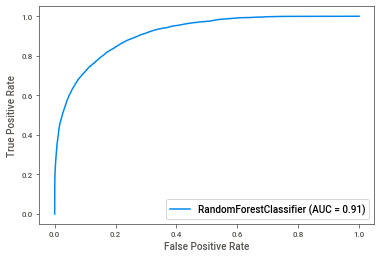

In [515]:
plot_roc_curve(rf_best, X_train_f, y_train)
plt.show()

# Open Invoice Data

In [593]:
dt_open = pd.read_csv("Open_Invoice_data.csv",encoding='unicode_escape')
dt_open.head()

,AS_OF_DATE,Customer Type,Customer_Name,Customer Account No,Transaction Number,Transaction Date,Payment Term,Due Date,Transaction Currency,Local Amount,Transaction Class,AGE,USD Amount,INV_CREATION_DATE
0,04-APR-2022 01:07:01,3rd Party,GIVE Corp,49144.0,100210000438,21/12/2021,Immediate,21/12/2021,AED,"-3,088",CREDIT NOTE,105,"-3,088",12/21/2021 12:53
1,04-APR-2022 01:07:01,Related Party,AL J Corp,23152.0,100220000052,01/02/2022,30 Days from Inv Date,03/03/2022,USD,"2,000",INVOICE,33,"2,000",2/1/2022 14:09
2,04-APR-2022 01:07:01,Related Party,AL J Corp,23152.0,100220000143,24/03/2022,30 Days from Inv Date,23/04/2022,USD,"2,000",INVOICE,-18,"2,000",3/24/2022 17:46
3,04-APR-2022 01:07:01,Related Party,AL R Corp,23312.0,100220000001,04/01/2022,15 Days from Inv Date,19/01/2022,AED,"2,415",INVOICE,76,"2,415",1/5/2022 11:49
4,04-APR-2022 01:07:01,Related Party,ALLI Corp,7530.0,100220000105,03/03/2022,30 Days from EOM,30/04/2022,AED,"3,800",INVOICE,-25,"3,800",3/3/2022 22:30


In [594]:
dt_open = dt_open[dt_open['AGE']>0]

In [601]:
dt_open.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59917 entries, 0 to 88203
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   AS_OF_DATE            59917 non-null  object        
 1   Customer Type         59917 non-null  object        
 2   Customer_Name         59917 non-null  object        
 3   Customer Account No   59917 non-null  object        
 4   Transaction Number    59908 non-null  object        
 5   Transaction Date      59917 non-null  object        
 6   Payment Term          59917 non-null  object        
 7   Due Date              59917 non-null  datetime64[ns]
 8   Transaction Currency  59917 non-null  object        
 9   Local Amount          59917 non-null  object        
 10  Transaction Class     59917 non-null  object        
 11  AGE                   59917 non-null  int64         
 12  USD Amount            59917 non-null  object        
 13  INV_CREATION_DAT

In [596]:
#Extract payment term from invoice creation date and due date and drop the payment term column
dt_open['Due Date'] = pd.to_datetime(dt_open['Due Date'])
dt_open['INV_CREATION_DATE'] = pd.to_datetime(dt_open['INV_CREATION_DATE'])
dt_open['Payment_term'] = (pd.to_datetime(dt_open['Due Date']) - pd.to_datetime(dt_open['INV_CREATION_DATE'])).dt.days
#dt_open = dt_open.drop('Payment Term',axis = 1)

In [600]:
#dt_open['Customer Account No'] = pd.to_numeric(dt_open['Customer Account No'], errors='coerce')
dt_open['Customer Account No'] = dt_open['Customer Account No'].astype(str)
#astype(int)

In [612]:
dt_open['Customer Account No'] = pd.to_numeric(dt_open['Customer Account No'], errors='coerce')

In [613]:
#Taking care of missing values in the data
print(dt_open.shape)
dt_open.dropna(axis = 0,inplace=True)
print(dt_open.shape)
dt_open.drop_duplicates()
print(dt_open.shape)

(59917, 15)
(59905, 15)
(59905, 15)


In [614]:
dt_open.head()

,AS_OF_DATE,Customer Type,Customer_Name,Customer Account No,Transaction Number,Transaction Date,Payment Term,Due Date,Transaction Currency,Local Amount,Transaction Class,AGE,USD Amount,INV_CREATION_DATE,Payment_term
0,04-APR-2022 01:07:01,3rd Party,GIVE Corp,49144.0,100210000438,21/12/2021,Immediate,2021-12-21,AED,"-3,088",CREDIT NOTE,105,"-3,088",2021-12-21 12:53:00,-1
1,04-APR-2022 01:07:01,Related Party,AL J Corp,23152.0,100220000052,01/02/2022,30 Days from Inv Date,2022-03-03,USD,"2,000",INVOICE,33,"2,000",2022-02-01 14:09:00,29
3,04-APR-2022 01:07:01,Related Party,AL R Corp,23312.0,100220000001,04/01/2022,15 Days from Inv Date,2022-01-19,AED,"2,415",INVOICE,76,"2,415",2022-01-05 11:49:00,13
19,04-APR-2022 01:07:01,Related Party,CGR Corp,3694.0,100220000078,15/02/2022,30 Days from EOM,2022-03-30,AED,"1,440",INVOICE,6,"1,440",2022-02-15 15:41:00,42
20,04-APR-2022 01:07:01,Related Party,CGR Corp,3694.0,100220000081,15/02/2022,30 Days from EOM,2022-03-30,AED,"1,144",INVOICE,6,"1,144",2022-02-15 15:41:00,42


In [615]:
#dt_open['Customer Account No'] = dt_open['Customer Account No'].astype(int)
dt_open['USD Amount'] = dt_open['USD Amount'].str.replace(',', '', regex=True)  # Remove commas
dt_open['USD Amount'] = pd.to_numeric(dt_open['USD Amount'], errors='coerce')  # Convert to numeric

# Now, you can safely convert to integers
dt_open['USD Amount'] = dt_open['USD Amount'].astype(int)
#dt_open.head()

In [616]:
dt_open.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59905 entries, 0 to 88203
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   AS_OF_DATE            59905 non-null  object        
 1   Customer Type         59905 non-null  object        
 2   Customer_Name         59905 non-null  object        
 3   Customer Account No   59905 non-null  float64       
 4   Transaction Number    59905 non-null  object        
 5   Transaction Date      59905 non-null  object        
 6   Payment Term          59905 non-null  object        
 7   Due Date              59905 non-null  datetime64[ns]
 8   Transaction Currency  59905 non-null  object        
 9   Local Amount          59905 non-null  object        
 10  Transaction Class     59905 non-null  object        
 11  AGE                   59905 non-null  int64         
 12  USD Amount            59905 non-null  int32         
 13  INV_CREATION_DAT

In [617]:
#Renaming columes as per train data
dt_open.rename({'Customer_Name':'CUSTOMER NAME', 'Customer Account No':'CUSTOMER NUMBER', 'INV_CREATION_DATE' : 'INVOICE_CREATION_DATE', 'Due Date' : 'DUE_DATE', 'Transaction Currency':'INVOICE_CURRENCY_CODE','INVOICE_ALLOCATED': 'Transaction Number','CUSTOMER_NUMBER':'CUSTOMER NUMBER'},axis = 1, inplace= True)
#Dropping columns which are not there in train data
dt_open.drop(['Transaction Date','AGE','Customer Type','AS_OF_DATE','Transaction Class'],axis = 1, inplace=True)
dt_open.head()

,CUSTOMER NAME,CUSTOMER NUMBER,Transaction Number,Payment Term,DUE_DATE,INVOICE_CURRENCY_CODE,Local Amount,USD Amount,INVOICE_CREATION_DATE,Payment_term
0,GIVE Corp,49144.0,100210000438,Immediate,2021-12-21,AED,"-3,088",-3088,2021-12-21 12:53:00,-1
1,AL J Corp,23152.0,100220000052,30 Days from Inv Date,2022-03-03,USD,"2,000",2000,2022-02-01 14:09:00,29
3,AL R Corp,23312.0,100220000001,15 Days from Inv Date,2022-01-19,AED,"2,415",2415,2022-01-05 11:49:00,13
19,CGR Corp,3694.0,100220000078,30 Days from EOM,2022-03-30,AED,"1,440",1440,2022-02-15 15:41:00,42
20,CGR Corp,3694.0,100220000081,30 Days from EOM,2022-03-30,AED,"1,144",1144,2022-02-15 15:41:00,42


In [618]:
dt_open.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59905 entries, 0 to 88203
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   CUSTOMER NAME          59905 non-null  object        
 1   CUSTOMER NUMBER        59905 non-null  float64       
 2   Transaction Number     59905 non-null  object        
 3   Payment Term           59905 non-null  object        
 4   DUE_DATE               59905 non-null  datetime64[ns]
 5   INVOICE_CURRENCY_CODE  59905 non-null  object        
 6   Local Amount           59905 non-null  object        
 7   USD Amount             59905 non-null  int32         
 8   INVOICE_CREATION_DATE  59905 non-null  datetime64[ns]
 9   Payment_term           59905 non-null  int64         
dtypes: datetime64[ns](2), float64(1), int32(1), int64(1), object(5)
memory usage: 4.8+ MB


In [619]:
# Dummy variable creation
dummy_open = pd.get_dummies(dt_open[['INVOICE_CURRENCY_CODE']],drop_first = True)
dt_open = pd.concat([dt_open,dummy_open],axis = 1)
dt_open.drop(['INVOICE_CURRENCY_CODE'],axis = 1, inplace = True)
dt_open.head()
X_test_final = dt_open.drop(['Local Amount'],axis = 1)

In [620]:
#Derive RFm features
RFM_df = dt_open.groupby('CUSTOMER NUMBER').apply(lambda group: pd.Series({
    'Recency': (pd.to_datetime('today') - group['INVOICE_CREATION_DATE'].max()).days,
    'Frequency': group.shape[0],
    'Monetary': group['USD Amount'].sum()
})).reset_index()



In [621]:
#Applying boxcox to avoid right skewed data
RFM_cols= ['Recency','Frequency','Monetary']
RFM_df_scaled = RFM_df.drop(['CUSTOMER NUMBER'],axis=1)
RFM_df_scaled['Recency'],_ = boxcox(RFM_df['Recency']+1)
#RFM_df_scaled['Frequency'],_ = boxcox(RFM_df['Frequency']+1)
shifted_data = RFM_df['Frequency'] - RFM_df['Frequency'].min() + 1  # Shifting to make all values positive
RFM_df_scaled['Frequency'], _ = boxcox(shifted_data)

#apply standard scaler
RFM_df_scaled[RFM_cols] = scaler.transform(RFM_df_scaled[RFM_cols])
kmeans.fit(RFM_df_scaled)
RFM_df['ClusterId'] = kmeans.labels_


In [622]:
X_test_final = pd.merge(X_test_final, RFM_df, on='CUSTOMER NUMBER', how='left')
X_test_final.head()

,CUSTOMER NAME,CUSTOMER NUMBER,Transaction Number,Payment Term,DUE_DATE,USD Amount,INVOICE_CREATION_DATE,Payment_term,INVOICE_CURRENCY_CODE_BHD,INVOICE_CURRENCY_CODE_CNY,...,INVOICE_CURRENCY_CODE_OMR,INVOICE_CURRENCY_CODE_QAR,INVOICE_CURRENCY_CODE_SAR,INVOICE_CURRENCY_CODE_SGD,INVOICE_CURRENCY_CODE_USD,INVOICE_CURRENCY_CODE_ZAR,Recency,Frequency,Monetary,ClusterId
0,GIVE Corp,49144.0,100210000438,Immediate,2021-12-21,-3088,2021-12-21 12:53:00,-1,0,0,...,0,0,0,0,0,0,677,93,-344625,1
1,AL J Corp,23152.0,100220000052,30 Days from Inv Date,2022-03-03,2000,2022-02-01 14:09:00,29,0,0,...,0,0,0,0,1,0,677,30,170394,1
2,AL R Corp,23312.0,100220000001,15 Days from Inv Date,2022-01-19,2415,2022-01-05 11:49:00,13,0,0,...,0,0,0,0,0,0,673,87,327416,1
3,CGR Corp,3694.0,100220000078,30 Days from EOM,2022-03-30,1440,2022-02-15 15:41:00,42,0,0,...,0,0,0,0,0,0,674,175,1300763,1
4,CGR Corp,3694.0,100220000081,30 Days from EOM,2022-03-30,1144,2022-02-15 15:41:00,42,0,0,...,0,0,0,0,0,0,674,175,1300763,1


In [623]:
X_test_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59905 entries, 0 to 59904
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   CUSTOMER NAME              59905 non-null  object        
 1   CUSTOMER NUMBER            59905 non-null  float64       
 2   Transaction Number         59905 non-null  object        
 3   Payment Term               59905 non-null  object        
 4   DUE_DATE                   59905 non-null  datetime64[ns]
 5   USD Amount                 59905 non-null  int32         
 6   INVOICE_CREATION_DATE      59905 non-null  datetime64[ns]
 7   Payment_term               59905 non-null  int64         
 8   INVOICE_CURRENCY_CODE_BHD  59905 non-null  uint8         
 9   INVOICE_CURRENCY_CODE_CNY  59905 non-null  uint8         
 10  INVOICE_CURRENCY_CODE_EGP  59905 non-null  uint8         
 11  INVOICE_CURRENCY_CODE_EUR  59905 non-null  uint8         
 12  INVO

In [624]:
X_test_final[cols].isnull().sum()

USD Amount                   0
Payment_term                 0
Recency                      0
Frequency                    0
Monetary                     0
ClusterId                    0
INVOICE_CURRENCY_CODE_BHD    0
INVOICE_CURRENCY_CODE_EUR    0
INVOICE_CURRENCY_CODE_GBP    0
INVOICE_CURRENCY_CODE_JOD    0
INVOICE_CURRENCY_CODE_KWD    0
INVOICE_CURRENCY_CODE_QAR    0
INVOICE_CURRENCY_CODE_SAR    0
INVOICE_CURRENCY_CODE_USD    0
INVOICE_CURRENCY_CODE_ZAR    0
dtype: int64

In [625]:
#Log transformation for skewed variables
cols = ['USD Amount','Payment_term','Recency','Frequency','Monetary']
#X_test_final[cols] = X_test_final[cols].apply(lambda x: np.log1p(x))
#MinMax scalar transformation on numerical columns
X_test_final[cols] = mscaler.transform(X_test_final[cols])
X_test_final.head()

,CUSTOMER NAME,CUSTOMER NUMBER,Transaction Number,Payment Term,DUE_DATE,USD Amount,INVOICE_CREATION_DATE,Payment_term,INVOICE_CURRENCY_CODE_BHD,INVOICE_CURRENCY_CODE_CNY,...,INVOICE_CURRENCY_CODE_OMR,INVOICE_CURRENCY_CODE_QAR,INVOICE_CURRENCY_CODE_SAR,INVOICE_CURRENCY_CODE_SGD,INVOICE_CURRENCY_CODE_USD,INVOICE_CURRENCY_CODE_ZAR,Recency,Frequency,Monetary,ClusterId
0,GIVE Corp,49144.0,100210000438,Immediate,2021-12-21,-56.432590,2021-12-21 12:53:00,-0.012638,0,0,...,0,0,0,0,0,0,676.939748,7.816853,-5381.179527,1
1,AL J Corp,23152.0,100220000052,30 Days from Inv Date,2022-03-03,36.549605,2022-02-01 14:09:00,0.366516,0,0,...,0,0,0,0,1,0,676.939748,2.480462,2660.633165,1
2,AL R Corp,23312.0,100220000001,15 Days from Inv Date,2022-01-19,44.133648,2022-01-05 11:49:00,0.164300,0,0,...,0,0,0,0,0,0,672.939748,7.308625,5112.467976,1
3,CGR Corp,3694.0,100220000078,30 Days from EOM,2022-03-30,26.315716,2022-02-15 15:41:00,0.530816,0,0,...,0,0,0,0,0,0,673.939748,14.762631,20310.886400,1
4,CGR Corp,3694.0,100220000081,30 Days from EOM,2022-03-30,20.906374,2022-02-15 15:41:00,0.530816,0,0,...,0,0,0,0,0,0,673.939748,14.762631,20310.886400,1


In [626]:
y_test_final = rf_best.predict(X_test_final[col])
y_test_final

array([0, 1, 0, ..., 1, 1, 1], dtype=int64)

In [627]:
Customer_id = X_test_final['CUSTOMER NUMBER'].iloc[X_test_final.index].values

In [628]:
y_pred_proba = rf_best.predict_proba(X_test_final[col])[:, 1]
y_pred_proba

array([0.15648476, 0.87596406, 0.43915263, ..., 0.79360089, 0.84380163,
       0.84380163])

In [629]:
result_df = pd.DataFrame({
    'customer_id': Customer_id,
    'y_pred': y_test_final,
    'y_pred_proba': y_pred_proba
})
result_df                           

,customer_id,y_pred,y_pred_proba
0,49144.0,0,0.156485
1,23152.0,1,0.875964
2,23312.0,0,0.439153
3,3694.0,1,0.793601
4,3694.0,1,0.793601
...,...,...,...
59900,1279.0,0,0.043309
59901,1279.0,0,0.043309
59902,1825.0,1,0.793601
59903,2273.0,1,0.843802


In [631]:
#Aggregate predict proba on customer level
result_df.groupby(['customer_id'])['y_pred_proba'].mean()

customer_id
1044.0     0.549753
1076.0     0.637435
1146.0     0.250517
1154.0     0.764656
1192.0     0.247358
             ...   
54869.0    0.380774
54871.0    0.120601
54885.0    0.380774
55045.0    0.120601
55049.0    0.120601
Name: y_pred_proba, Length: 1191, dtype: float64